Making Random Noise signal

In [0]:
class Voltmeter:
  def __init__(self,_truevoltage,_noiselevel):
    self.truevoltage = _truevoltage
    self.noiselevel = _noiselevel
  def GetVoltage(self):
    return self.truevoltage
  def GetVoltageWithNoise(self):
    return random.gauss(self.GetVoltage(),self.noiselevel)

In [3]:
import numpy as np
pure = np.linspace(-1, 1, 100)
noise = np.random.normal(0, 1, pure.shape)
signal = pure + noise
Voltmeter


[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.



---



---

**Making a Kalman Filter for the Noise**

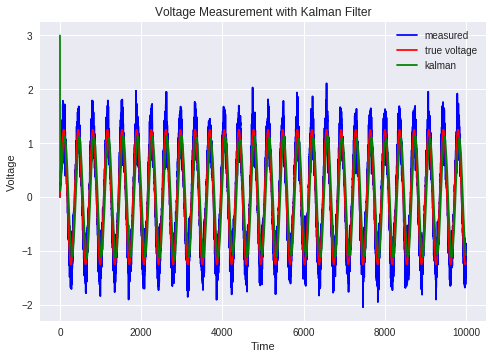

In [29]:
import random
import numpy
import pylab

# Implements a linear Kalman filter.
class KalmanFilterLinear:
  def __init__(self,_A, _B, _H, _x, _P, _Q, _R):
    self.A = _A                      # State transition matrix.
    self.B = _B                      # Control matrix.
    self.H = _H                      # Observation matrix.
    self.current_state_estimate = _x # Initial state estimate.
    self.current_prob_estimate = _P  # Initial covariance estimate.
    self.Q = _Q                      # Estimated error in process.
    self.R = _R                      # Estimated error in measurements.
  def GetCurrentState(self):
    return self.current_state_estimate
  def Step(self,control_vector,measurement_vector):
    #---------------------------Prediction step-----------------------------
    predicted_state_estimate = self.A * self.current_state_estimate + self.B * control_vector
    predicted_prob_estimate = (self.A * self.current_prob_estimate) * numpy.transpose(self.A) + self.Q
    #--------------------------Observation step-----------------------------
    innovation = measurement_vector - self.H*predicted_state_estimate
    innovation_covariance = self.H*predicted_prob_estimate*numpy.transpose(self.H) + self.R
    #-----------------------------Update step-------------------------------
    kalman_gain = predicted_prob_estimate * numpy.transpose(self.H) * numpy.linalg.inv(innovation_covariance)
    self.current_state_estimate = predicted_state_estimate + kalman_gain * innovation
    # We need the size of the matrix so we can make an identity matrix.
    size = self.current_prob_estimate.shape[0]
    # eye(n) = nxn identity matrix.
    self.current_prob_estimate = (numpy.eye(size)-kalman_gain*self.H)*predicted_prob_estimate

class Voltmeter:
  def __init__(self,_truevoltage,_noiselevel):
    self.truevoltage = _truevoltage
    self.noiselevel = _noiselevel
  def GetVoltage(self):
    return self.truevoltage
  def GetVoltageWithNoise(self):
    return random.gauss(self.GetVoltage(),self.noiselevel)

numsteps = 10000

A = numpy.matrix([1])
H = numpy.matrix([1])
B = numpy.matrix([0])
Q = numpy.matrix([0.0001])
R = numpy.matrix([0.1])
xhat = numpy.matrix([3])
P    = numpy.matrix([1])

filter = KalmanFilterLinear(A,B,H,xhat,P,Q,R)

voltmeter = Voltmeter(1.25,0.25)
  

measuredvoltage = []
truevoltage = []
kalman = []
pi=22/7
for i in range(numsteps):
    measured = (voltmeter.GetVoltageWithNoise())*numpy.sin(i*pi/180)
    measuredvoltage.append(measured)
    truevoltage.append(numpy.sin(i*pi/180)*voltmeter.GetVoltage())
    kalman.append(filter.GetCurrentState()[0,0])
    filter.Step(numpy.matrix([0]),numpy.matrix([measured]))

pylab.plot(range(numsteps),measuredvoltage,'b',range(numsteps),truevoltage,'r',range(numsteps),kalman,'g')
pylab.xlabel('Time')
pylab.ylabel('Voltage')
pylab.title('Voltage Measurement with Kalman Filter')
pylab.legend(('measured','true voltage','kalman'))
pylab.show()